In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib import dates
# %matplotlib inline
# import statsmodels.api as sm
# import seaborn as sns

# import chart_studio.plotly as py
# import plotly.express as px
# import plotly.graph_objects as go

# import pandas as pd



In [2]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
# from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

import statsmodels.api as sm

In [330]:
auto_analysis_df = pd.read_excel(r'analysis.xlsx')

In [331]:
auto_analysis_df = auto_analysis_df[['Дата'
                                     , 'Количество выданных автокредитов в месяц, тыс. штук'
                                     , 'Число регистраций в месяц, тыс. штук'
                                     , 'Количество выданных автокредитов в месяц на новые автомобили, тыс. штук'
                                     , 'Число регистраций новых автомобилей в месяц, тыс. штук'
                                     , 'Количество выданных автокредитов в месяц на автомобили с пробегом, тыс. штук'
                                     , 'Число регистраций автомобилей с пробегом в месяц, тыс. штук'
                                     , 'Ключ ЦБ РФ'
                                    ]]

In [332]:
auto_analysis_df.rename(columns={'Дата': 'report_date'
                                 , 'Количество выданных автокредитов в месяц, тыс. штук' : 'auto_loan_k'
                                 , 'Число регистраций в месяц, тыс. штук' : 'auto_register_k'
                                 , 'Количество выданных автокредитов в месяц на новые автомобили, тыс. штук' : 'new_auto_loan_k'
                                 , 'Число регистраций новых автомобилей в месяц, тыс. штук' : 'new_auto_register_k'
                                 , 'Количество выданных автокредитов в месяц на автомобили с пробегом, тыс. штук' : 'old_auto_loan_k'
                                 , 'Число регистраций автомобилей с пробегом в месяц, тыс. штук' : 'old_auto_register_k'
                                 ,  'Ключ ЦБ РФ' : 'cbr_key_rate'
                                }, inplace=True)

In [333]:
# from datetime import timedelta

# auto_analysis_df['report_date'] = auto_analysis_df['report_date'] - timedelta(days=1)

In [334]:
auto_analysis_df = auto_analysis_df[auto_analysis_df.report_date<'2025-01-31']

In [335]:
auto_analysis_df = auto_analysis_df.set_index('report_date')

In [336]:
# start_date = min(auto_analysis_df.index)
# end_date = max(auto_analysis_df.index)

# plt.figure(figsize=(10,4))
# plt.plot(auto_analysis_df['auto_register_k'])
# plt.title('auto loans in 1000s of contracts', fontsize=20)
# plt.ylabel('auto_register_k', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [337]:
# first_diff = auto_analysis_df['old_auto_loan_k'].diff()[1:]

In [338]:

# plt.figure(figsize=(10,4))
# plt.plot(first_diff)
# plt.title('auto loans in 1000s of contracts', fontsize=20)
# plt.ylabel('auto loans', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
# plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [339]:
# fig = plt.figure(figsize=(12,8))
# fig=sm.graphics.tsa.plot_pacf(first_diff.values, lags=len(acf_vals))

In [340]:
# fig = plt.figure(figsize=(12,8))
# fig=sm.graphics.tsa.plot_acf(first_diff.values, lags=len(acf_vals))

In [341]:
# train_data = auto_analysis_df[auto_analysis_df.index<'2024-01-31']['auto_loan_k']
# test_data = auto_analysis_df[auto_analysis_df.index>'2023-12-31']['auto_loan_k']

train_data = auto_analysis_df[auto_analysis_df.index<'2025-01-31']['auto_loan_k']

In [342]:
# # Run auto_arima as seasonal with m since the season occurs 
# # over 12 months
# auto_arima(train_data, seasonal=True, m=12, trace=True).summary()

In [561]:
x_df = auto_analysis_df['auto_loan_k']
y_df = auto_analysis_df['auto_register_k']
x_name = 'Количество выданных автокредитов в месяц, тыс. штук'
y_name = 'Число регистраций в месяц, тыс. штук'



# x_df = auto_analysis_df['new_auto_loan_k']
# y_df = auto_analysis_df['new_auto_register_k']
# x_name = 'Количество выданных автокредитов в месяц на новые автомобили, тыс. штук'
# y_name = 'Число регистраций новых автомобилей в месяц, тыс. штук'



# x_df = auto_analysis_df['old_auto_loan_k']
# y_df = auto_analysis_df['old_auto_register_k']
# x_name = 'Количество выданных автокредитов в месяц на автомобили с пробегом, тыс. штук'
# y_name = 'Число регистраций автомобилей с пробегом в месяц, тыс. штук'

In [562]:
key_rate = 21

In [563]:
# define model
model = SARIMAX(x_df
                , exog = auto_analysis_df['cbr_key_rate']
                , order=(12, 1, 1)
                , seasonal_order=(0, 1, 1, 12)
               )

C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [564]:
model_fit = model.fit()

C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [565]:
#summary of the model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         auto_loan_k   No. Observations:                   48
Model:             SARIMAX(12, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -155.175
Date:                             Thu, 06 Mar 2025   AIC                            342.350
Time:                                     19:17:52   BIC                            367.236
Sample:                                 01-31-2021   HQIC                           350.940
                                      - 12-31-2024                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cbr_key_rate    -3.5356      1.332     -2.653      0.008      -6.147      -0.924
ar.L1            0.4277      0.316      1.355      0.175      -0.191       1.046
ar.L2            0.1339      0.344      0.390      0.697      -0.540       0.808
ar.L3            0.2010      0.258      0.779      0.436      -0.305       0.707
ar.L4           -0.0273      0.309     -0.088      0.930      -0.633       0.579
ar.L5           -0.0543      0.423     -0.128      0.898      -0.884       0.776
ar.L6            0.0985      0.482      0.204      0.838      -0.846       1.043
ar.L7            0.0893      0.429      0.208      0.835      -0.751       0.930
ar.L8           -0.1699      0.207     -0.819      0.413      -0.577       0.237
ar.L9            0.1336      0.433      0.309      0.757      -0.714       0.981
ar.L10           0.0222      0.390      0.057      0.955      -0.743       0.787
ar.L11           0.3630      0.238      1.523      0.128      -0.104       0.830
ar.L12          -0.7750      0.274     -2.829      0.005      -1.312      -0.238
ma.L1           -0.9713      0.763     -1.273      0.203      -2.467       0.524
ma.S.L12         0.5679      0.857      0.663      0.508      -1.112       2.248
sigma2         292.3066    208.206      1.404      0.160    -115.770     700.383
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.81   Prob(JB):                         0.76
Heteroskedasticity (H):               0.96   Skew:                             0.12
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [566]:
# #get the predictions and residuals
# predictions = model_fit.forecast(auto_analysis_df.index)
# predictions = pd.Series(predictions, index=train_data.index)
# residuals = train_data - predictions

In [567]:
# plt.figure(figsize=(10,4))
# plt.plot(residuals)
# plt.axhline(0, linestyle='--', color='k')
# plt.title('Residuals from SARIMA Model', fontsize=20)
# plt.ylabel('Error', fontsize=16)

In [568]:
# plt.figure(figsize=(10,4))

# plt.plot(auto_analysis_df['auto_loan_k'])
# plt.plot(predictions)

# plt.legend(('Data', 'Predictions'), fontsize=16)

# plt.title('auto loans in 1000s of contracts', fontsize=20)
# plt.ylabel('auto loans', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [569]:
# Forecast the next 12 steps
forecast_steps = 12

future_exog = np.ones(12)*key_rate

forecast = model_fit.get_forecast(steps=forecast_steps
                                  , exog=future_exog.reshape(-1, 1)
                                 )
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a DataFrame for the forecast
# forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast_mean).rename(columns={'predicted_mean': 'Forecast'})

# Combine the original data and the forecast
combined_df = pd.concat([x_df, forecast_df], axis=0)

# Display the forecast
# print(forecast_df)

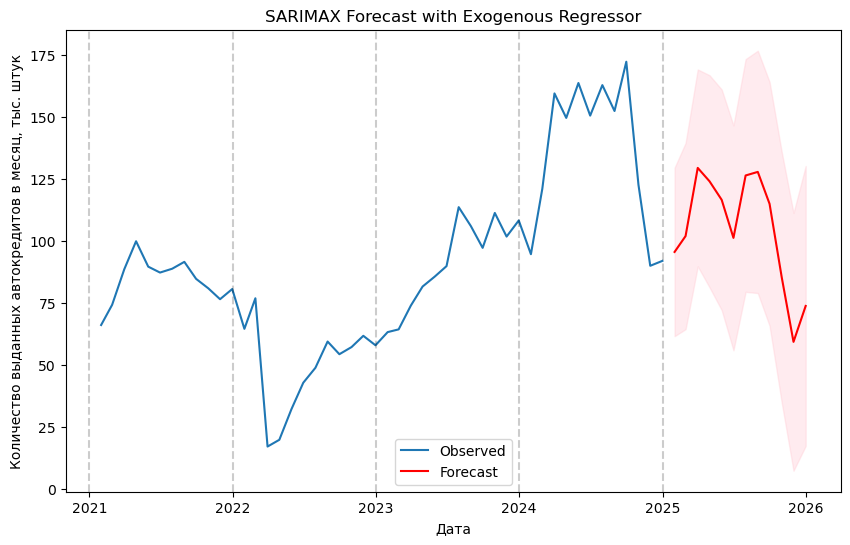

In [570]:
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df[x_df.name], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast with Exogenous Regressor')
plt.xlabel('Дата')
plt.ylabel(x_name)
plt.legend()
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [571]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
# SARIMAX(order=(p, d, q), seasonal_order=(P, D, Q, S), exog=exogenous_data)
model = SARIMAX(
    y_df,  # Endogenous variable (the time series to predict)
    exog = pd.concat([x_df, auto_analysis_df['cbr_key_rate']], axis=1),  # Exogenous variable
    order=(12, 1, 0),  # Non-seasonal order (p, d, q)
    seasonal_order=(0, 1, 1, 12)  # Seasonal order (P, D, Q, S)
)

# Fit the model
results = model.fit(disp=False)

# Display the summary of the model
results.summary()

C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\klyukin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                       auto_register_k   No. Observations:                   48
Model:             SARIMAX(12, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -183.414
Date:                               Thu, 06 Mar 2025   AIC                            398.829
Time:                                       19:17:53   BIC                            423.714
Sample:                                   01-31-2021   HQIC                           407.419
                                        - 12-31-2024                                         
Covariance Type:                                 opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
auto_loan_k      1.5140      0.462      3.278      0.001       0.609       2.419
cbr_key_rate     7.0570      3.241      2.177      0.029       0.705      13.409
ar.L1           -0.3531      0.392     -0.902      0.367      -1.120       0.414
ar.L2            0.2671      0.358      0.745      0.456      -0.435       0.969
ar.L3            0.1019      0.353      0.289      0.773      -0.590       0.794
ar.L4           -0.2610      0.496     -0.526      0.599      -1.233       0.711
ar.L5           -0.2740      0.372     -0.736      0.462      -1.003       0.456
ar.L6            0.2775      0.410      0.677      0.498      -0.526       1.081
ar.L7           -0.2602      0.256     -1.017      0.309      -0.762       0.241
ar.L8           -0.0864      0.511     -0.169      0.866      -1.089       0.916
ar.L9            0.1369      0.267      0.512      0.608      -0.387       0.660
ar.L10          -0.1800      0.483     -0.373      0.709      -1.126       0.766
ar.L11          -0.2830      0.378     -0.748      0.455      -1.025       0.459
ar.L12          -0.2611      0.422     -0.619      0.536      -1.087       0.565
ma.S.L12        -0.8435      3.551     -0.238      0.812      -7.804       6.117
sigma2        1188.6350   4081.284      0.291      0.771   -6810.535    9187.805
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 1.66
Prob(Q):                              0.50   Prob(JB):                         0.44
Heteroskedasticity (H):               1.06   Skew:                            -0.42
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [572]:
# Forecast the next 12 steps
forecast_steps = 12

# Create future values for the exogenous variable
future_exog_1 = combined_df[-12:]['Forecast'].values  # Simulate future exogenous values
future_exog_2 = np.ones(12)*key_rate
future_exog = np.column_stack((future_exog_1, future_exog_2))

# Forecast
forecast = results.get_forecast(steps=forecast_steps, exog=future_exog.reshape(-1, 1))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a DataFrame for the forecast
# forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast_mean).rename(columns={'predicted_mean': 'Forecast'})

# Combine the original data and the forecast
combined_df = pd.concat([y_df, forecast_df], axis=0)

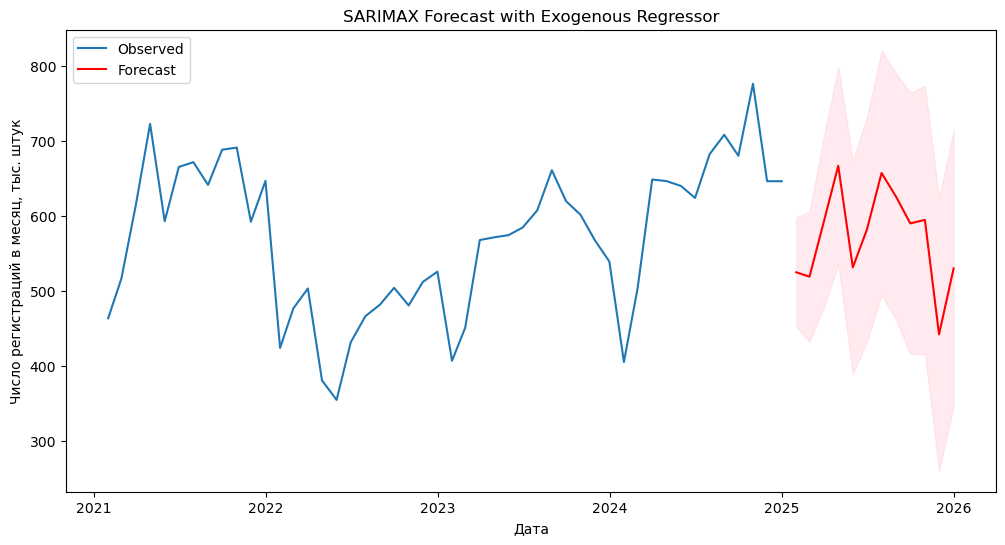

In [573]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df[y_df.name], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast with Exogenous Regressor')
plt.xlabel('Дата')
plt.ylabel(y_name)
plt.legend()
plt.show()

In [574]:
forecast_ci.to_excel(r"forecast_ci.xlsx", index=True)

In [575]:
combined_df.to_excel(r"combined_df.xlsx", index=True)

In [ ]:
import numpy as np
import pandas as pd

# Create a date range
date_range = pd.date_range(start='2020-01-01', periods=100, freq='M')

# Create a toy dataset with a seasonal component and trend
np.random.seed(42)
seasonal_component = 10 * np.sin(2 * np.pi * np.arange(100) / 12)
trend_component = 0.5 * np.arange(100)
noise = np.random.normal(0, 2, 100)

# Create an exogenous variable (e.g., advertising spend)
exog_variable = np.random.normal(10, 2, 100)  # Random values for the exogenous variable

# Combine components to create the time series
data = trend_component + seasonal_component + 0.8 * exog_variable + noise

# Create a DataFrame
df = pd.DataFrame({'Value': data, 'Exog': exog_variable}, index=date_range)

# Display the first few rows
print(df.head())

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Value')
plt.plot(df.index, df['Exog'], label='Exogenous Variable', linestyle='--')
plt.title('Toy Time Series Data with Exogenous Regressor')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
# SARIMAX(order=(p, d, q), seasonal_order=(P, D, Q, S), exog=exogenous_data)
model = SARIMAX(
    df['Value'],  # Endogenous variable (the time series to predict)
    exog=df['Exog'],  # Exogenous variable
    order=(1, 1, 2),  # Non-seasonal order (p, d, q)
    seasonal_order=(1, 1, 1, 12)  # Seasonal order (P, D, Q, S)
)

# Fit the model
results = model.fit(disp=False)

# Display the summary of the model
print(results.summary())

In [ ]:
future_exog.reshape(-1, 1)

In [ ]:
# Forecast the next 12 steps
forecast_steps = 12

# Create future values for the exogenous variable
future_exog = np.random.normal(10, 2, forecast_steps)  # Simulate future exogenous values

# Forecast
forecast = results.get_forecast(steps=forecast_steps, exog=future_exog.reshape(-1, 1))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast_mean).rename(columns={'predicted_mean': 'Forecast'})

# Combine the original data and the forecast
combined_df = pd.concat([df['Value'], forecast_df], axis=0)

# Display the forecast
print(forecast_df)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Value'], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast with Exogenous Regressor')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()